In [4]:
import pandas as pd
df = pd.read_csv('linearY.csv')
df

,0.99523
0,0.99007
1,0.99769
2,0.99386
3,0.99508
4,0.99630
...,...
94,0.99620
95,0.99760
96,0.99464
97,0.99830


In [5]:
df.describe()

,0.99523
count,99.000000
mean,0.996634
std,0.002062
min,0.990070
25%,0.995430
50%,0.996550
75%,0.997640
max,1.003200


In [6]:
X = pd.read_csv('linearX.csv').values.flatten()
y = pd.read_csv('linearY.csv').values.flatten()

print(X[:5])
print(y[:5])

[8.  9.1 8.4 6.9 7.7]
[0.99007 0.99769 0.99386 0.99508 0.9963 ]


In [7]:
import numpy as np
# Normalize the data (Feature scaling)
X = (X - np.mean(X)) / np.std(X)
y = (y - np.mean(y)) / np.std(y)

# Convert to numpy arrays for easier manipulation
X = np.array(X)
y = np.array(y)

In [8]:
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    errors = predictions - y
    cost = (1 / (2 * m)) * np.sum(errors ** 2)
    return cost


In [9]:
def gradient_descent(X, y, theta, learning_rate, num_iterations):
    m = len(y)
    cost_history = []

    for i in range(num_iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        gradients = (1 / m) * X.T.dot(errors)
        theta -= learning_rate * gradients
        cost_history.append(compute_cost(X, y, theta))
    
    return theta, cost_history


In [10]:
# Add intercept (bias term) to X
X_train = np.c_[np.ones(X.shape[0]), X]  # Adds a column of ones
theta = np.zeros(X_train.shape[1])  # Initialize theta (parameters)
learning_rate = 0.5
num_iterations = 1000

# Train the model
theta, cost_history = gradient_descent(X_train, y, theta, learning_rate, num_iterations)
print("Final theta values:", theta)
print("Final cost value:", cost_history[-1])


Final theta values: [-2.44052814e-15  6.61955471e-01]
Final cost value: 0.28090747721040477


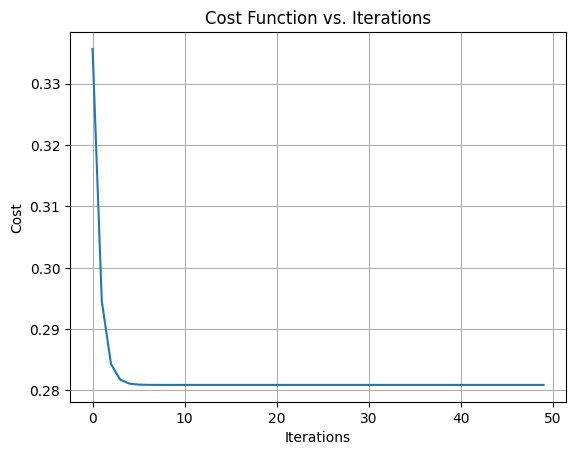

In [11]:
import matplotlib.pyplot as plt
plt.plot(range(50), cost_history[:50])
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Function vs. Iterations")
plt.grid()
plt.show()


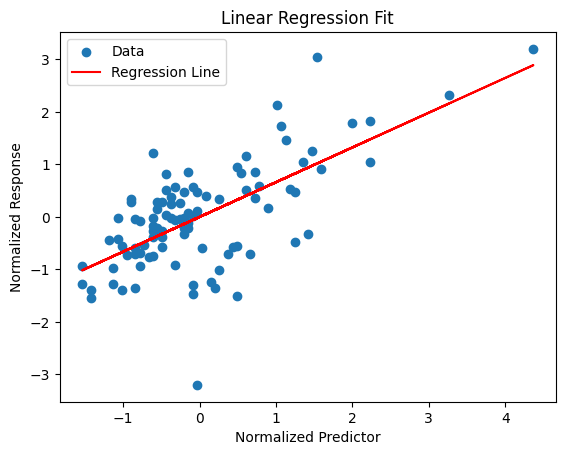

In [12]:
# Regression line
plt.scatter(X, y, label="Data")
plt.plot(X, theta[0] + theta[1] * X, color="red", label="Regression Line")
plt.xlabel("Normalized Predictor")
plt.ylabel("Normalized Response")
plt.legend()
plt.title("Linear Regression Fit")
plt.show()


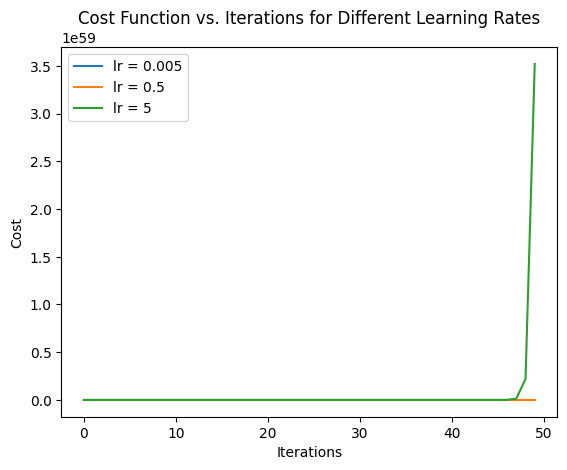

In [13]:
learning_rates = [0.005, 0.5, 5]
for lr in learning_rates:
    theta = np.zeros(X_train.shape[1])  # Reset theta
    _, cost_history = gradient_descent(X_train, y, theta, lr, 50)
    plt.plot(range(50), cost_history, label=f"lr = {lr}")

plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Function vs. Iterations for Different Learning Rates")
plt.legend()
plt.show()


In [14]:
def stochastic_gradient_descent(X, y, theta, learning_rate, num_iterations):
    m = len(y)
    cost_history = []

    for i in range(num_iterations):
        for j in range(m):
            random_index = np.random.randint(m)
            x_j = X[random_index:random_index+1]
            y_j = y[random_index:random_index+1]
            predictions = x_j.dot(theta)
            errors = predictions - y_j
            gradients = x_j.T.dot(errors)
            theta -= learning_rate * gradients
        cost_history.append(compute_cost(X, y, theta))
    
    return theta, cost_history


def mini_batch_gradient_descent(X, y, theta, learning_rate, num_iterations, batch_size):
    m = len(y)
    cost_history = []

    for i in range(num_iterations):
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]
        for start in range(0, m, batch_size):
            end = start + batch_size
            x_batch = X_shuffled[start:end]
            y_batch = y_shuffled[start:end]
            predictions = x_batch.dot(theta)
            errors = predictions - y_batch
            gradients = (1 / len(y_batch)) * x_batch.T.dot(errors)
            theta -= learning_rate * gradients
        cost_history.append(compute_cost(X, y, theta))
    
    return theta, cost_history


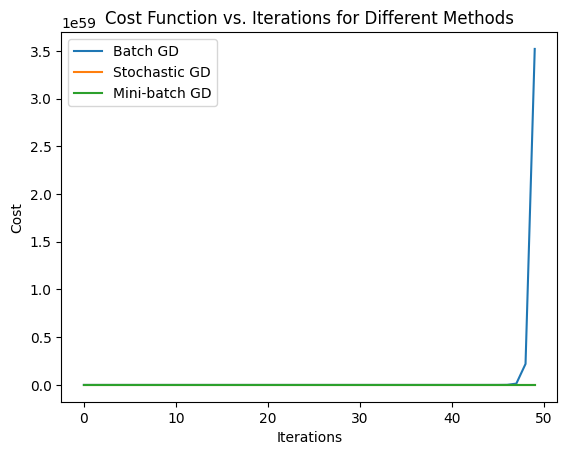

In [15]:
# Stochastic Gradient Descent
theta = np.zeros(X_train.shape[1])
theta_sgd, cost_history_sgd = stochastic_gradient_descent(X_train, y, theta, 0.1, 50)

# Mini-batch Gradient Descent
theta = np.zeros(X_train.shape[1])
theta_mbgd, cost_history_mbgd = mini_batch_gradient_descent(X_train, y, theta, 0.1, 50, batch_size=20)

# Plot results
plt.plot(range(50), cost_history[:50], label="Batch GD")
plt.plot(range(50), cost_history_sgd, label="Stochastic GD")
plt.plot(range(50), cost_history_mbgd, label="Mini-batch GD")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Function vs. Iterations for Different Methods")
plt.legend()
plt.show()
